<a href="https://colab.research.google.com/github/LucasBezerraSantos/Projetos_BlueEdtech/blob/BlueEdtech/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kmeans | Classificação de Perfil de Clientes.
----
Lucas Bezerra Santos - Ciência de Dados

### Leitura e reconhecimento dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/sample_data/store.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.columns = ['id_cliente', 'genero', 'idade', 'renda anual',
       'nivel de gastos']

In [5]:
data.set_index('id_cliente', inplace=True) # setar o index 
data.head()

,genero,idade,renda anual,nivel de gastos
id_cliente,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df = data[['renda anual', 'nivel de gastos']]
df

,renda anual,nivel de gastos
id_cliente,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


### Visualização

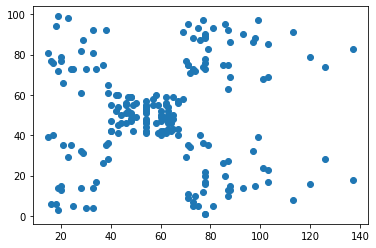

In [7]:
plt.scatter(df['renda anual'], df['nivel de gastos'])

### Definição do modelo

In [8]:
#identificar quantidade de clusters

from sklearn.cluster import KMeans
X = df.values

Text(0, 0.5, 'Variações')

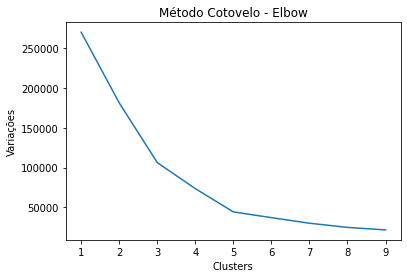

In [9]:
variacoes = []
for i in range(1, 10):                # faz o numero de interações para ajuste do modelo
  Kmeans = KMeans(n_clusters=i, init='k-means++') #inclui o número de clusters
  Kmeans.fit(X)                       #realiza a análise dos elementos
  variacoes.append(Kmeans.inertia_)   # inércia_ flutuar Distâncias quadradas das amostras até o centro do cluster mais ponderado pelos pesos próximos.

plt.plot(range(1, 10), variacoes)
plt.title('Método Cotovelo - Elbow')
plt.xlabel('Clusters')
plt.ylabel('Variações')

In [10]:
kmeans_final = KMeans(n_clusters=5)
kmeans_final.fit(X)

cluster_pred = kmeans_final.predict(X)
cluster_pred # realiza a predição do cluster para cada elemento da base - 200 neste caso.

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0], dtype=int32)

In [11]:
cluster_centro = kmeans_final.cluster_centers_
cluster_centro # mostra os centros para cada linha, 0 e 1. Devido serem 5 clusters, tem 5 centros na vertical e 5 na horizontal. 
               # Se junta-los você tem a posição dos 5 centros. vertical/horizontal. 

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

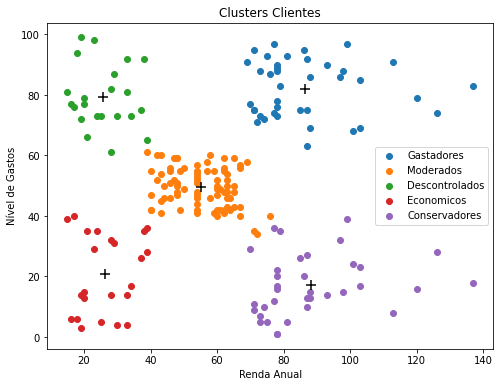

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[cluster_pred == 0, 0], X[cluster_pred == 0, 1], label='Gastadores')
plt.scatter(X[cluster_pred == 1, 0], X[cluster_pred == 1, 1], label='Moderados')
plt.scatter(X[cluster_pred == 2, 0], X[cluster_pred == 2, 1], label='Descontrolados')
plt.scatter(X[cluster_pred == 3, 0], X[cluster_pred == 3, 1], label='Economicos')
plt.scatter(X[cluster_pred == 4, 0], X[cluster_pred == 4, 1], label='Conservadores')
plt.scatter(cluster_centro[:,0], cluster_centro[:,1], marker='+', s=100, c='black')
plt.legend()
plt.title('Clusters Clientes')
plt.ylabel('Nível de Gastos')
plt.xlabel('Renda Anual')
plt.show()